In [1]:
# Importing the dataset!
import pandas as pd
df = pd.read_csv('telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [2]:
df.shape

(3333, 11)

In [3]:
# Checking for nulls!
df.isna().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [4]:
# Checking for duplicates!
df.duplicated().sum()

0

In [5]:
# datatypes of column!
df.dtypes

,0
Churn,int64
AccountWeeks,int64
ContractRenewal,int64
DataPlan,int64
DataUsage,float64
CustServCalls,int64
DayMins,float64
DayCalls,int64
MonthlyCharge,float64
OverageFee,float64


In [6]:
# Calculating Descriptive statistics!
descriptive_stats = df.describe()
print(descriptive_stats)

             Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16

In [7]:
# Identifying outliers using IQR method!
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins',
                      'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# define Outliers!
outliers = (df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))

# count the number of outliers in each column!
# Display the number of outliers in each numerical feature
print("Number of Outliers in Each Numerical Feature:")
print(outliers.sum())


Number of Outliers in Each Numerical Feature:
AccountWeeks      18
DataUsage         11
CustServCalls    267
DayMins           25
DayCalls          23
MonthlyCharge     34
OverageFee        24
RoamMins          46
dtype: int64


CustServCalls: The high number of outliers here might indicate customers who experienced many issues or had high support needs. This could be a valuable insight for churn analysis.

Other Features: The number of outliers in other features seems relatively small compared to the dataset size.

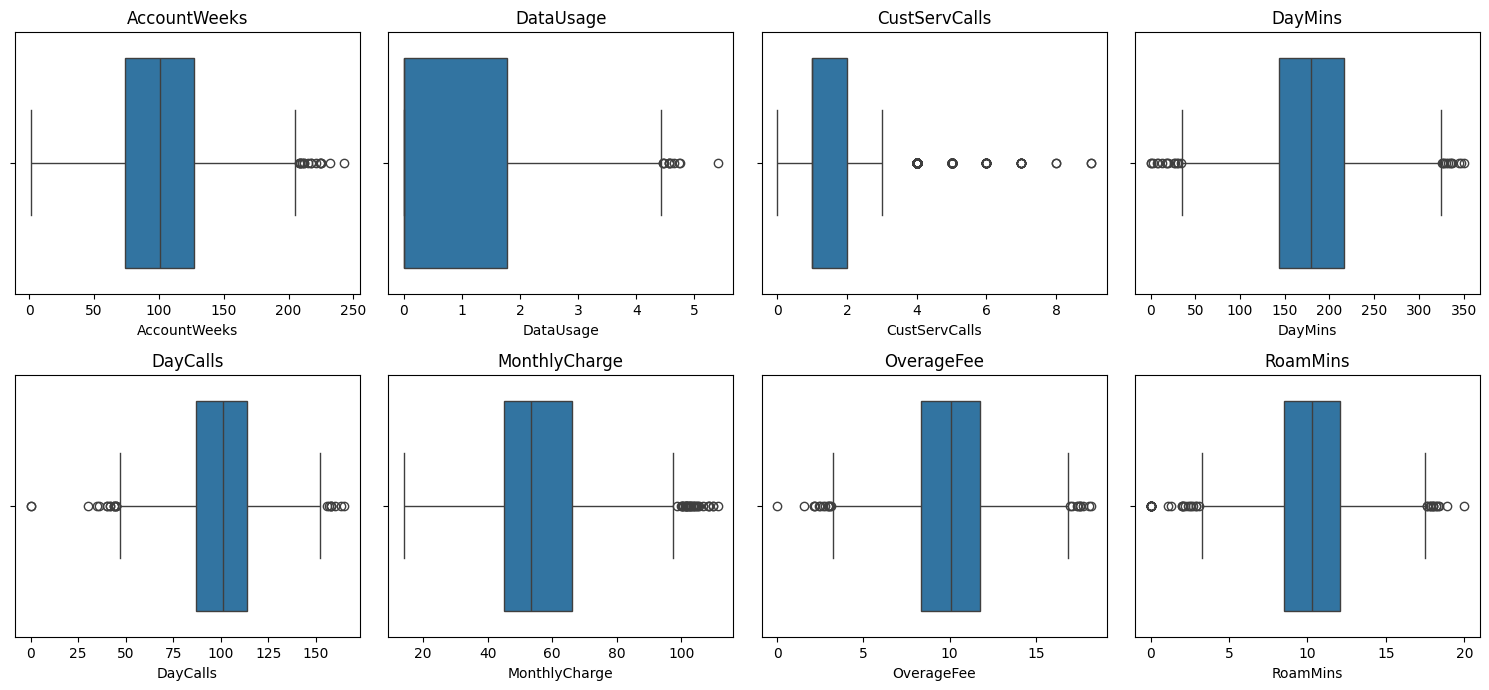

In [8]:
# Creating box plot for each numerical feature to visualise ouliers!
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


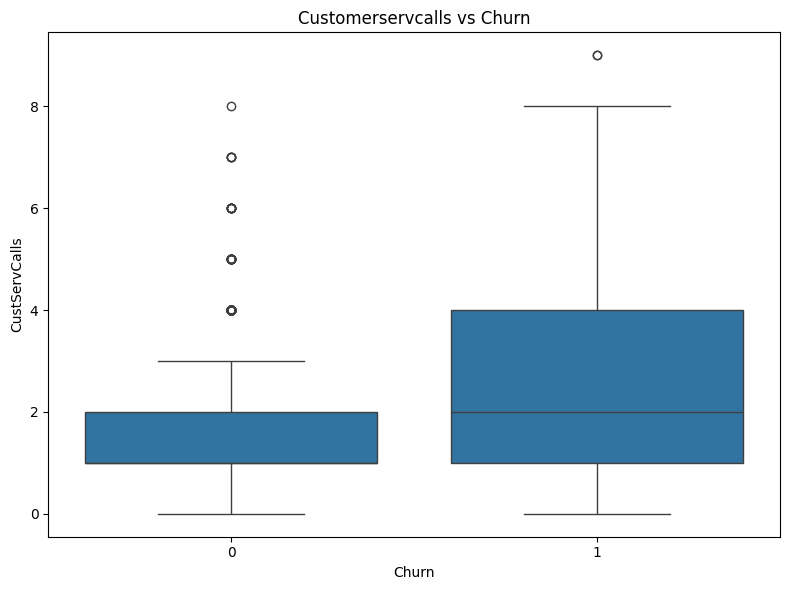

In [9]:
# examining the relationship between Customerservcalls and Churn!
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='CustServCalls', data=df)
plt.title('Customerservcalls vs Churn')
plt.tight_layout()
plt.show()

Key Insights:
* For Churn = 0: The majority of customers who didn't churn have fewer customer service calls, with a smaller range and fewer outliers.
* For Churn = 1: Customers who did churn tend to have a higher number of customer service calls, and there are some extreme values (outliers) where certain customers made many more calls than average.

This suggest that customers who frequently contacted customer service are more likely to churn, than who didn't.




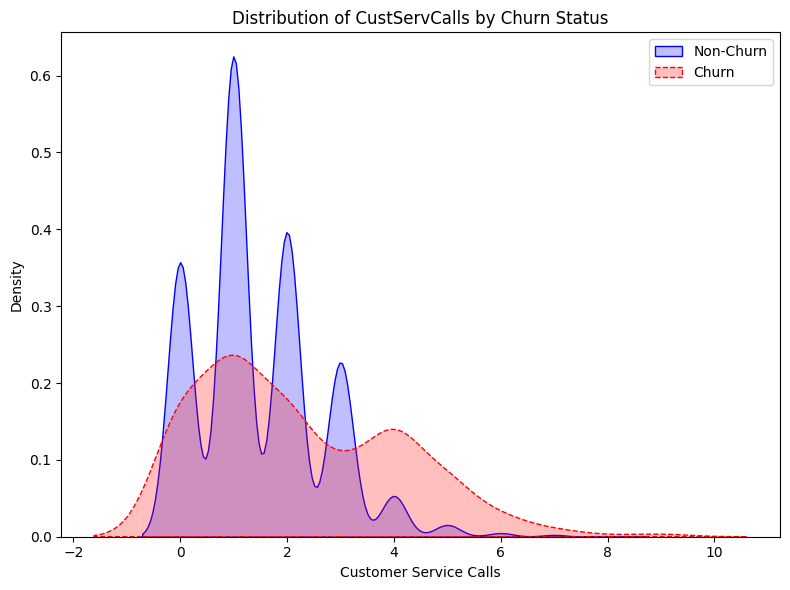

In [10]:
# Distribution of CustServCalls by Churn in kdeplot!
plt.figure(figsize=(8, 6))

sns.kdeplot(df[df['Churn'] == 0]['CustServCalls'], label='Non-Churn', fill=True, color='blue', linestyle='-')
sns.kdeplot(df[df['Churn'] == 1]['CustServCalls'], label='Churn', fill=True, color='red', linestyle='--')

plt.xlabel('Customer Service Calls')
plt.ylabel('Density')
plt.title('Distribution of CustServCalls by Churn Status')
plt.legend()
plt.tight_layout()
plt.show()

Key Insights:
This distribution plot shows that customers with higher numbers of customer service calls tend to have a higher likelihood of churn. This trend is evident as the red dashed line (representing churned customers) has a heavier tail toward higher numbers of customer service calls, whereas the blue line (non-churned customers) peaks at fewer calls.

In [11]:
# performing Statistics test
from scipy.stats import ttest_ind

# Separate the churned and non-churned customers
churned = df[df['Churn'] == 1]['CustServCalls']
non_churned = df[df['Churn'] == 0]['CustServCalls']

# Perform an independent t-test
t_stat, p_value = ttest_ind(churned, non_churned, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 8.95514138244338, P-value: 5.270040385717215e-18


Key Insights:

The large t-statistic (8.96) and the extremely small p-value (5.27e-18) provide strong evidence that the difference in CustServCalls between churned and non-churned customers is statistically significant and shows strong evidence that the number of customer service calls a customer makes is indeed related to their likelihood of churning. Customers who churn tend to have a different number of customer service calls compared to those who don't.


In [12]:
# Compute correlation with 'Churn'
churn_corr = df.corr()['Churn'].sort_values(ascending=False)
print(churn_corr)



Churn              1.000000
CustServCalls      0.208750
DayMins            0.205151
OverageFee         0.092812
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
DataUsage         -0.087195
DataPlan          -0.102148
ContractRenewal   -0.259852
Name: Churn, dtype: float64


Key Insights:

* CustServCalls (0.209): Weak positive correlation.
* DayMins (0.205): Weak positive correlation.
* ContractRenewal (-0.26): Weak negative correlation. This suggests that customers who recently renewed their contracts are less likely to churn.
* DataPlan (-0.102): Weak negative correlation. This suggests that customers with a data plan are less likely to churn.
* DataUsage (-0.087): Very weak negative correlation.means that there's a slight tendency for customers with higher data usage to be a little less likely to churn.

Potential predictors: CustServCalls, DayMins, and ContractRenewal show relatively stronger correlations and might be useful predictors in a churn prediction model.

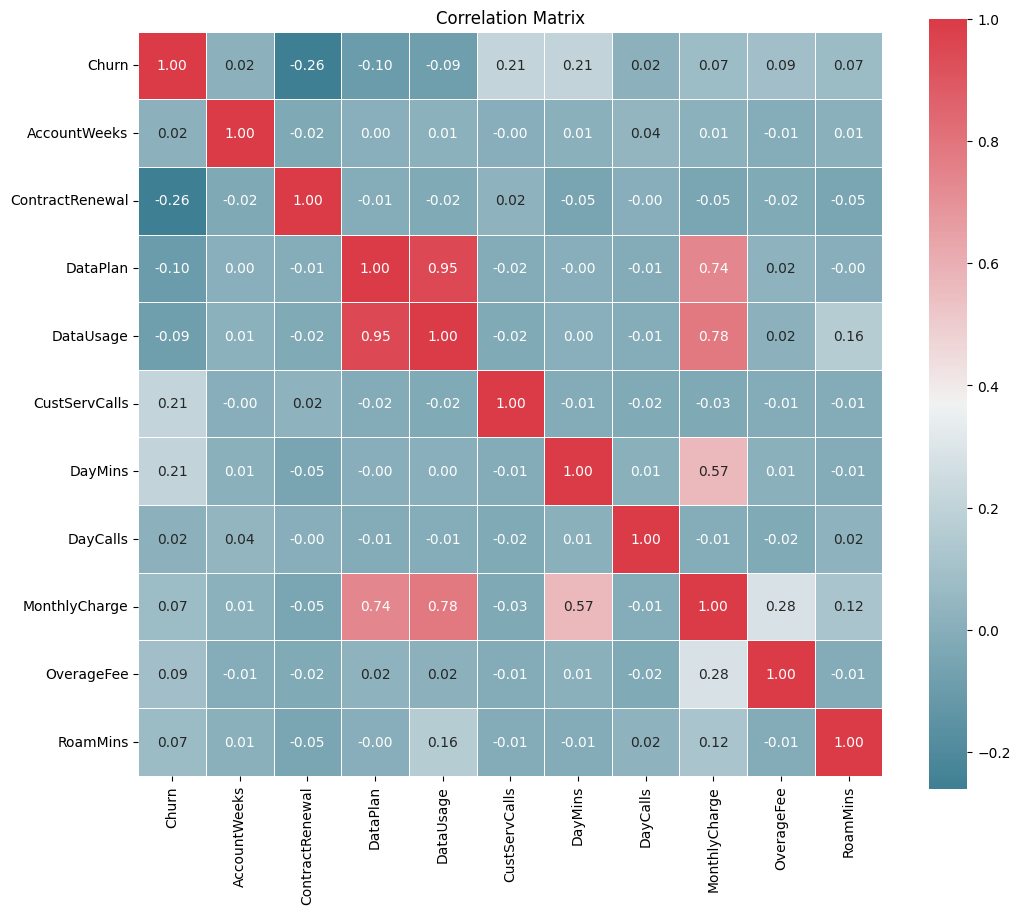

In [13]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


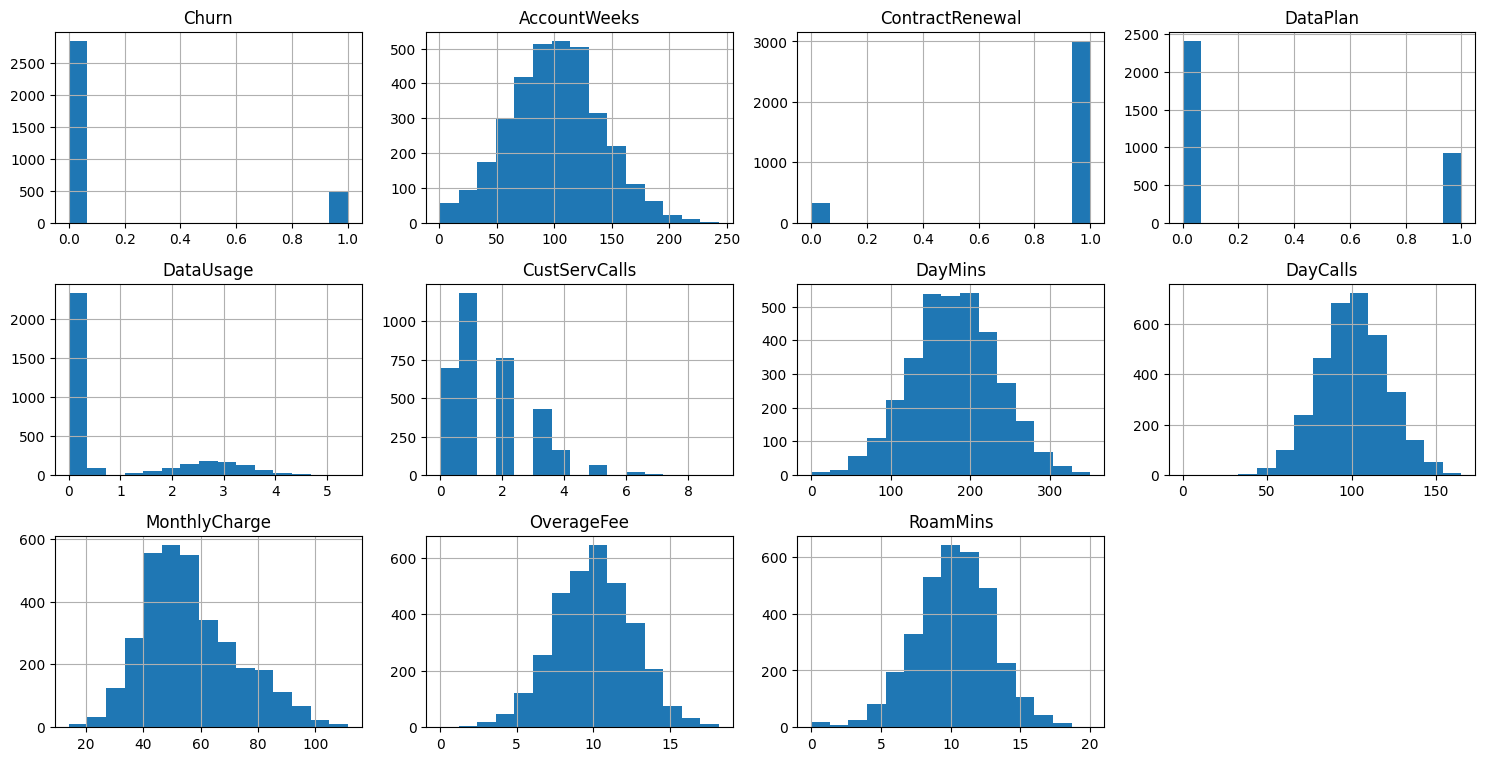

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


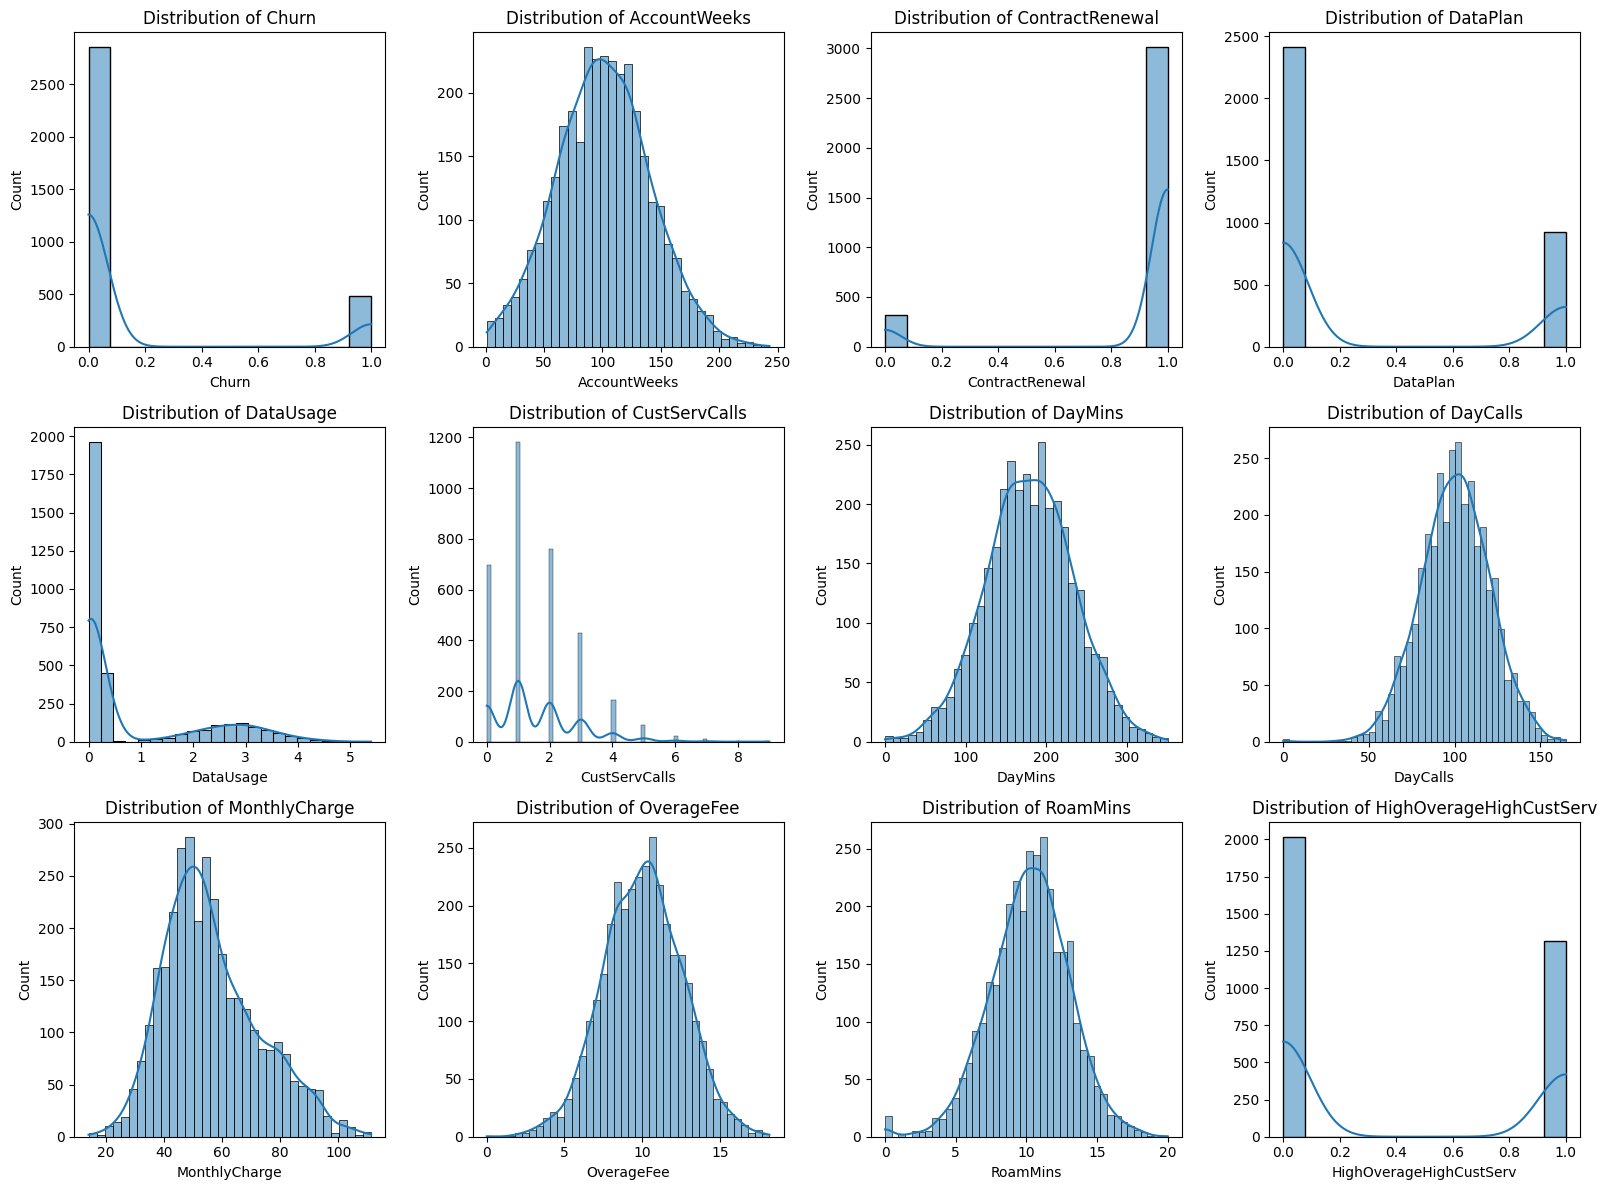

In [26]:
# Histograms for numeric columns to visualize distributions
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Key Insights:

Account weeks:
- The distribution of AccountWeeks appears to be relatively uniform, suggesting that customers have been with the company for varying lengths of time.
- There are no significant outliers or extreme values in this feature.

DataUsage:
- The distribution of DataUsage is skewed to the right, with a majority of customers having lower data usage.
- There are some customers with significantly higher data usage, which shows different customer segment.

CustomerServcalls:
- The distribution of CustServCalls is also skewed to the right, with most customers making a few or no customer service calls.
- There's a long tail, indicating some customers have made a high number of calls, which could be potential churn indicators.


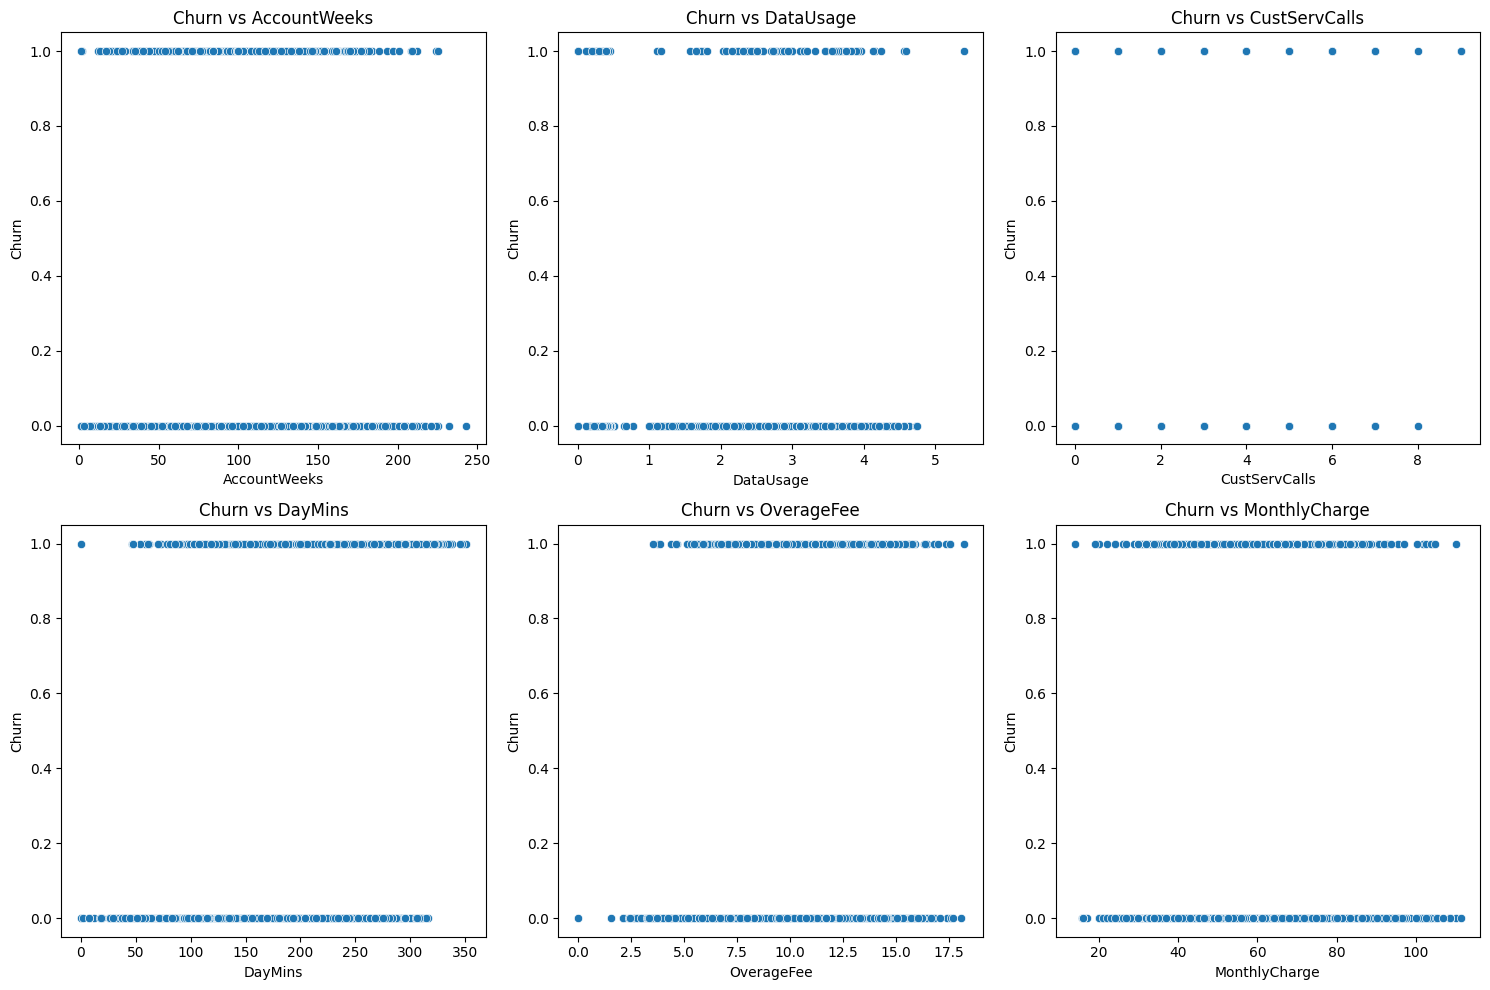

In [25]:
# Scatter plot for churn vs key numerical features
key_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'OverageFee', 'MonthlyCharge']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.scatterplot(x=df[feature], y=df['Churn'], ax=axes[idx])
    axes[idx].set_title(f'Churn vs {feature}')

plt.tight_layout()
plt.show()

Key Insights:

* CustServCalls shows a clear trend: as the number of customer service calls increases, the likelihood of churn also rises.
* DataUsage and MonthlyCharge exhibit weaker relationships with churn, but DataUsage shows a slight decline in churn for higher usage.
-
These results suggest that CustServCalls and DataUsage might be strong predictors of churn

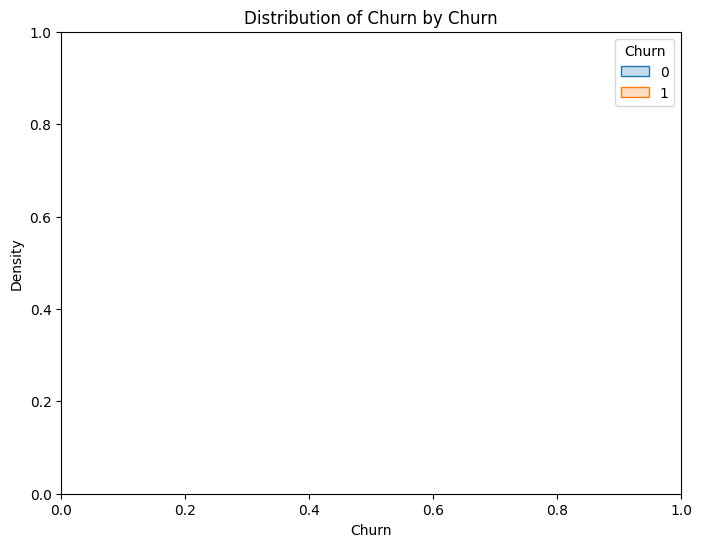

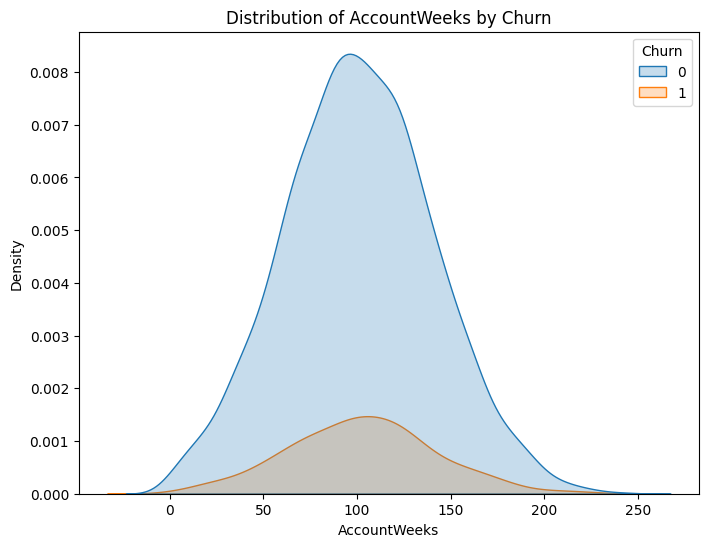

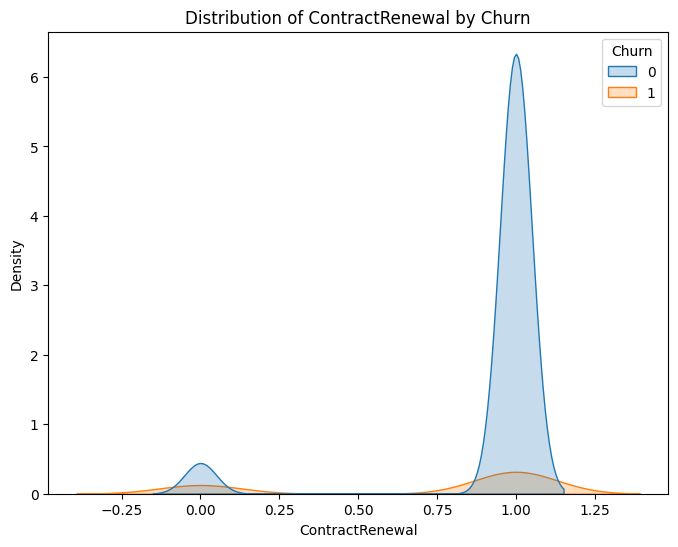

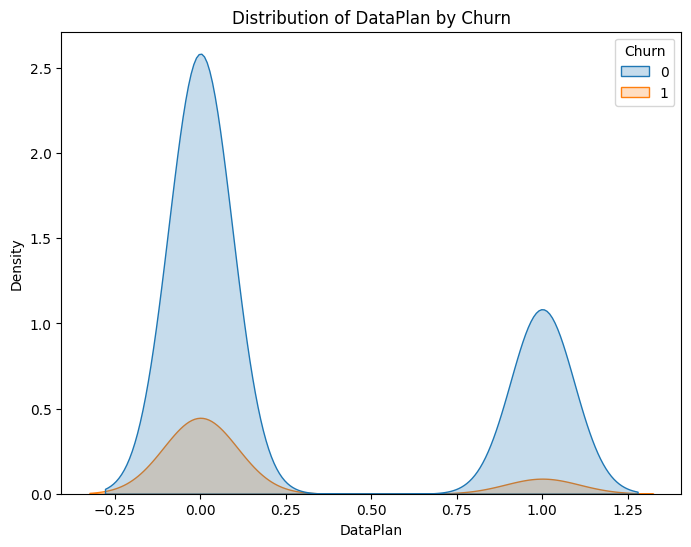

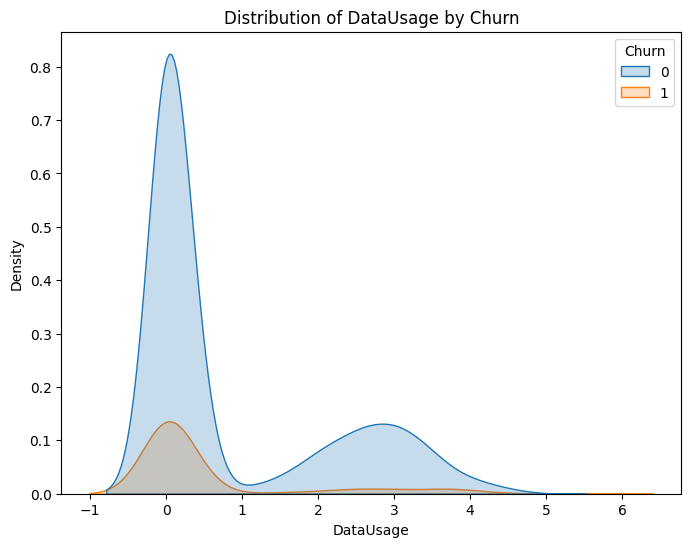

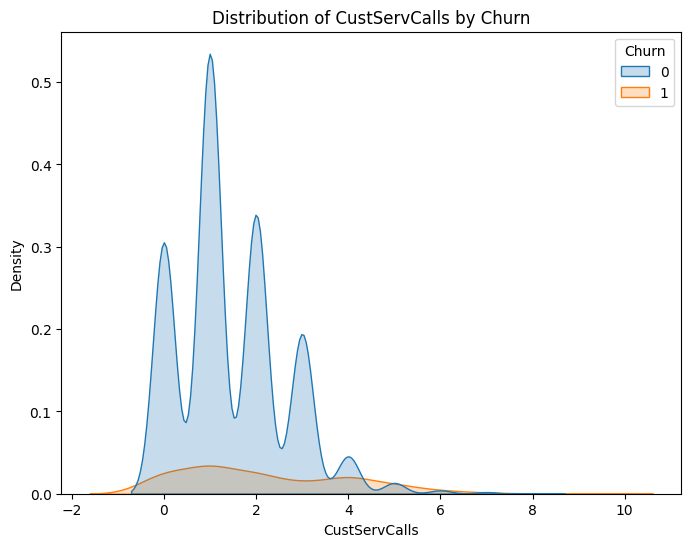

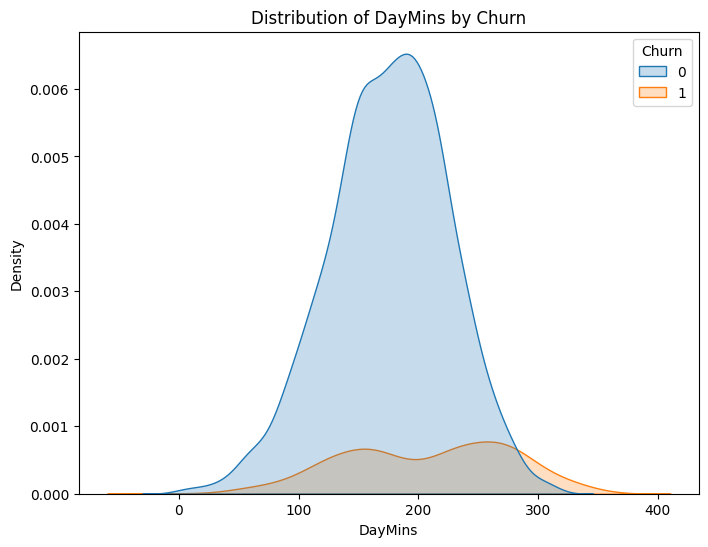

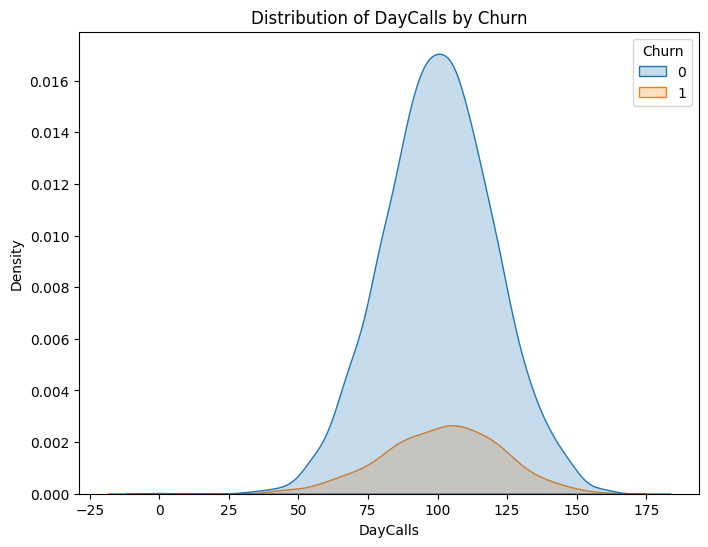

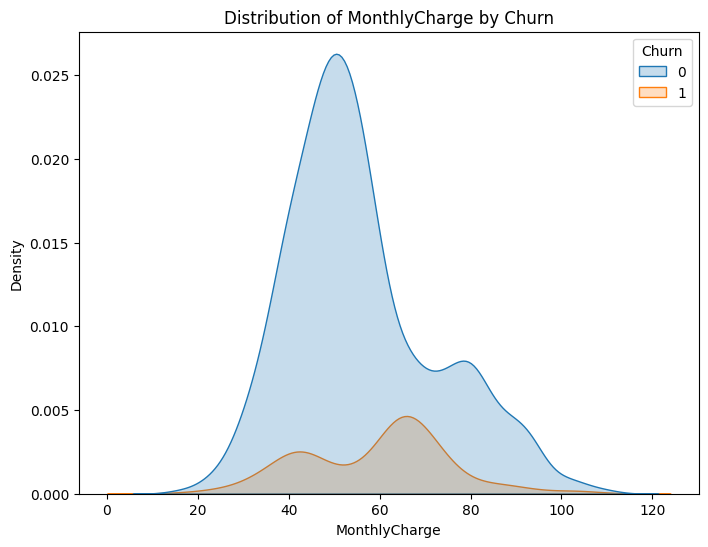

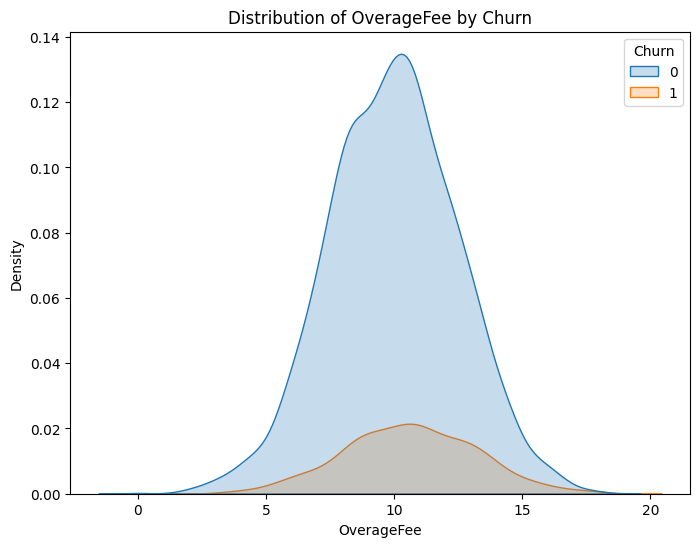

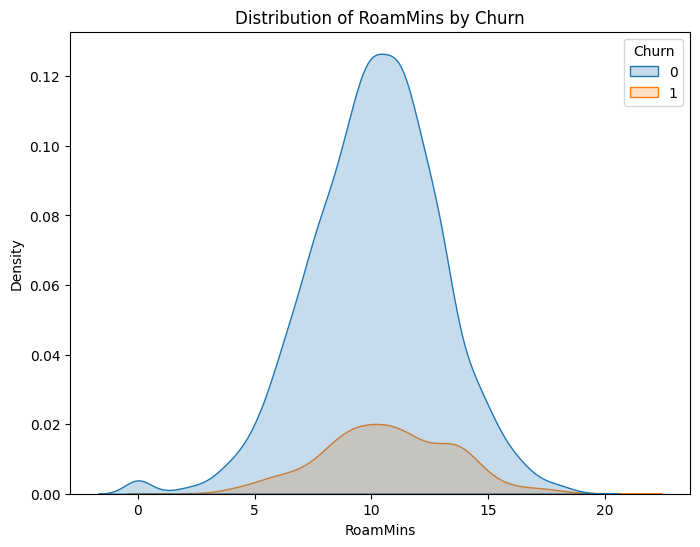

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=df, x=col, hue = 'Churn', fill=True, warn_singular=False)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

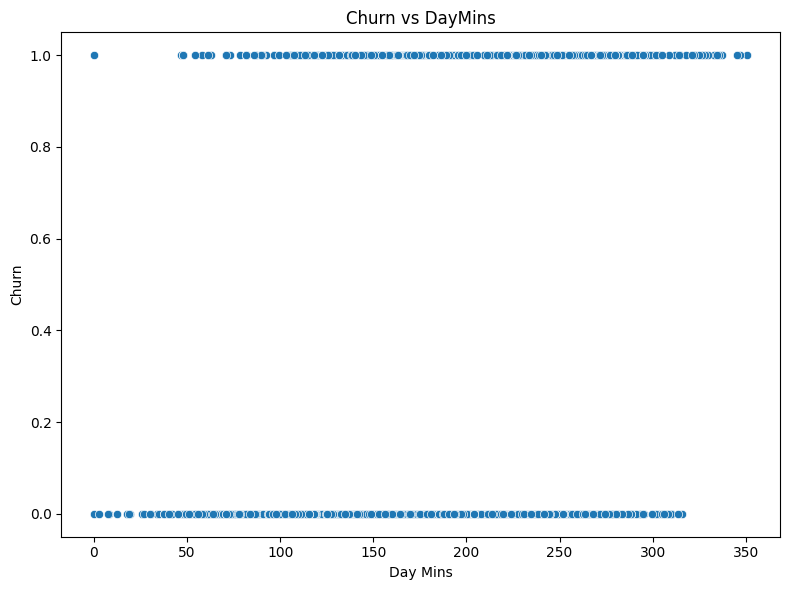

In [20]:
# Create scatter plot for Churn vs DayMins
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['DayMins'], y=df['Churn'])
plt.title('Churn vs DayMins')
plt.xlabel('Day Mins')
plt.ylabel('Churn')
plt.tight_layout()
plt.show()

Key Insights:
- The scatter plot suggests a positive correlation between DayMins and Churn.
- Customers who use more daytime minutes appear to be more likely to churn.
- There's a noticeable trend of higher churn rates (Churn = 1) for customers with higher DayMins values.

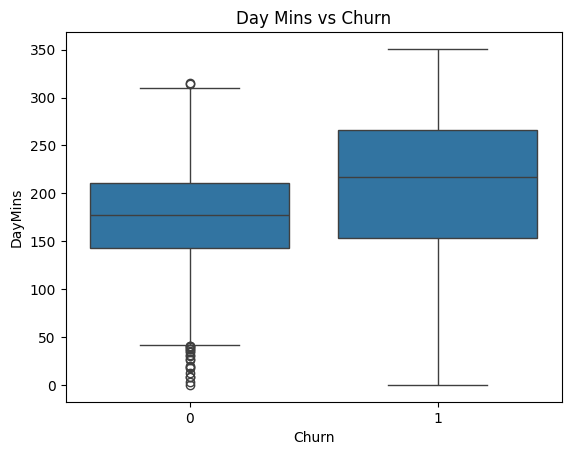

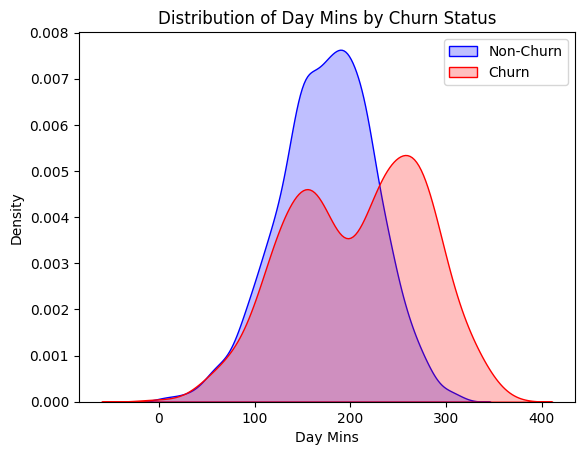

In [22]:
# Boxplot of Day Mins vs Churn
sns.boxplot(x='Churn', y='DayMins', data=df)
plt.title('Day Mins vs Churn')
plt.show()

# Density plot of Day Mins by Churn Status
sns.kdeplot(df[df['Churn'] == 0]['DayMins'], fill=True, color="blue", label='Non-Churn')
sns.kdeplot(df[df['Churn'] == 1]['DayMins'], fill=True, color="red", label='Churn')
plt.title('Distribution of Day Mins by Churn Status')
plt.xlabel('Day Mins')
plt.legend()
plt.show()


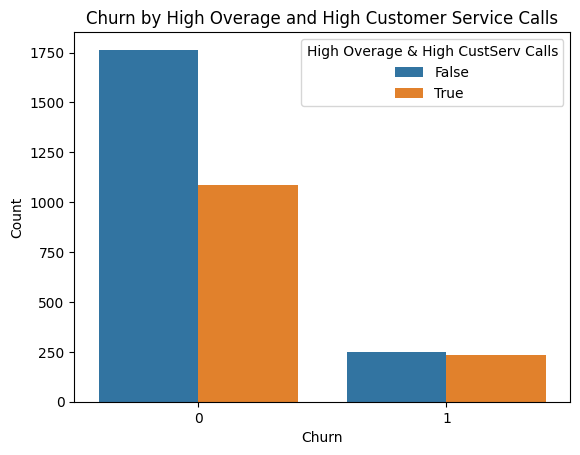

In [21]:
# Define high CustServCalls and high OverageFee based on the median
df['HighOverageHighCustServ'] = (df['CustServCalls'] >= df['CustServCalls'].median()) & (df['OverageFee'] >= df['OverageFee'].median())

# Plotting churn based on the new combined feature
sns.countplot(x='Churn', hue='HighOverageHighCustServ', data=df)
plt.title('Churn by High Overage and High Customer Service Calls')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='High Overage & High CustServ Calls')
plt.show()

Key Insights:
* Customers with both high overage fees and high customer service calls are more likely to churn compared to those with lower values in these categories.
* This combination seems to be a strong indicator of churn, which aligns with the hypothesis that customers experiencing higher service-related issues and additional costs are more likely to leave.

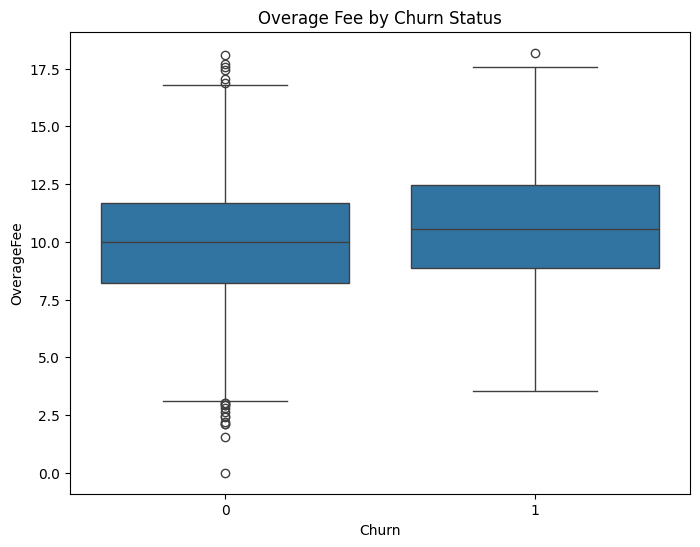

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Churn', y='OverageFee')
plt.title('Overage Fee by Churn Status')
plt.show()

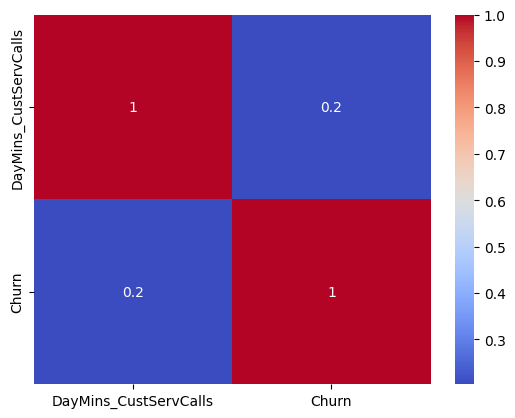

In [27]:
# Example: Creating interaction term between DayMins and CustServCalls
df['DayMins_CustServCalls'] = df['DayMins'] * df['CustServCalls']

# Check the correlation with Churn
corr_matrix = df[['DayMins_CustServCalls', 'Churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


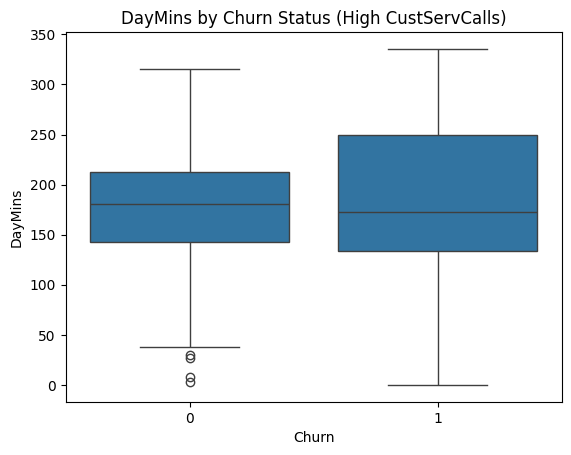

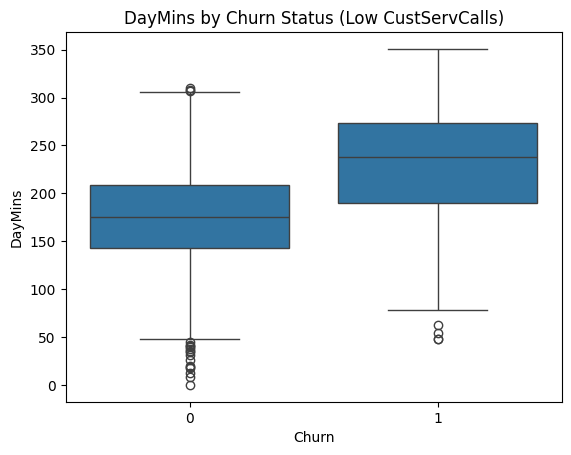

In [30]:
# Segment data by CustServCalls (e.g., high vs. low)
high_calls = df[df['CustServCalls'] > df['CustServCalls'].median()]
low_calls = df[df['CustServCalls'] <= df['CustServCalls'].median()]

# Plot DayMins vs Churn for high and low CustServCalls groups
sns.boxplot(x='Churn', y='DayMins', data=high_calls)
plt.title('DayMins by Churn Status (High CustServCalls)')
plt.show()

sns.boxplot(x='Churn', y='DayMins', data=low_calls)
plt.title('DayMins by Churn Status (Low CustServCalls)')
plt.show()
